#### https://github.com/krishnaik06/Complete-Feature-Selection

<b>feature extraction and feature engineering:</b> transformation of raw data into features suitable for modeling;

<b>feature transformation:</b> transformation of data to improve the accuracy of the algorithm;

<b>feature selection:</b> removing unnecessary features.

### Feature Selection- Dropping constant features

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [1]:
# Import pandas to create DataFrame 
import pandas as pd 
  
# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]})

In [2]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


In [3]:
data.var()

A    1.866667
B    3.500000
C    0.000000
D    0.000000
dtype: float64

#### Variance Threshold

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [6]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold()
var_thres.fit(data)

VarianceThreshold()

In [7]:
#A & B r non-zero variance. C & D are false since its zerio variance(in this case, its constant)
var_thres.get_support()

array([ True,  True, False, False])

In [8]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [9]:
# Removing 0 variances column
constant_columns = [column for column in data.columns if column not in data.columns[var_thres.get_support()]]

In [10]:
constant_columns

['C', 'D']

In [11]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


#### Lets practise on bigger dataset

In [12]:
import pandas as pd

In [43]:
df = pd.read_csv('santander.csv')

In [44]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [68]:
df.var() # Returns variance in the column

ID                         False
var3                       False
var15                      False
imp_ent_var16_ult1         False
imp_op_var39_comer_ult1    False
                           ...  
saldo_medio_var44_hace3    False
saldo_medio_var44_ult1     False
saldo_medio_var44_ult3     False
var38                      False
TARGET                     False
Length: 371, dtype: bool

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10103 entries, 0 to 10102
Columns: 371 entries, ID to TARGET
dtypes: float64(89), int64(282)
memory usage: 28.6 MB


In [46]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,10103.000000,10103.000000,10103.000000,10103.000000,10103.000000,10103.000000,10103.000000,10103.000000,10103.000000,10103.00000,...,10103.00000,10103.000000,10103.000000,10103.000000,10103.000000,10103.000000,10103.000000,10103.000000,1.010300e+04,10103.000000
mean,10140.685044,-690.161239,33.282490,102.788807,74.070282,126.916082,6.631868,11.704371,0.602791,0.91458,...,3.34276,1.257464,3.767897,2.980414,15.167855,2.687312,26.949930,19.805286,1.169137e+05,0.038800
std,5873.923050,26314.528959,12.928974,2360.995028,341.314855,577.470332,148.523566,238.123000,28.434068,41.50570,...,209.90292,79.971865,220.842463,167.875477,597.862433,195.278382,869.774945,646.550655,1.582776e+05,0.193128
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048518e+04,0.000000
25%,5063.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.780611e+04,0.000000
50%,10090.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.070204e+05,0.000000
75%,15208.500000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.201260e+05,0.000000
max,20271.000000,235.000000,102.000000,210000.000000,7904.220000,15182.460000,7904.220000,11073.570000,1800.000000,3000.00000,...,15265.95000,6643.290000,15458.220000,11959.170000,44990.490000,18928.590000,47617.080000,36988.200000,9.055272e+06,1.000000


In [47]:
df.isnull().sum() > 0

ID                         False
var3                       False
var15                      False
imp_ent_var16_ult1         False
imp_op_var39_comer_ult1    False
                           ...  
saldo_medio_var44_hace3    False
saldo_medio_var44_ult1     False
saldo_medio_var44_ult3     False
var38                      False
TARGET                     False
Length: 371, dtype: bool

In [48]:
df.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.002340,-0.003119,0.024096,0.006138,0.001584,0.001835,-0.006387,0.009238,0.009482,...,-0.013300,-0.008857,-0.011305,-0.010581,-0.010954,-0.007415,-0.009010,-0.009065,-0.007698,-0.013258
var3,-0.002340,1.000000,-0.007238,0.001148,0.005754,0.005850,0.001199,0.001355,0.000558,0.000580,...,0.000430,0.000438,0.000459,0.000480,0.000702,0.000407,0.000840,0.000832,-0.000064,0.005285
var15,-0.003119,-0.007238,1.000000,0.033204,0.111905,0.116972,0.060329,0.071630,0.015653,0.013414,...,0.022752,0.021014,0.023254,0.023644,0.026100,0.018215,0.030120,0.028955,0.001771,0.111491
imp_ent_var16_ult1,0.024096,0.001148,0.033204,1.000000,0.022996,0.019280,0.011145,0.008166,0.003589,0.008132,...,-0.000693,-0.000685,-0.000640,-0.000637,-0.001105,-0.000599,-0.001349,-0.001334,0.000802,0.000188
imp_op_var39_comer_ult1,0.006138,0.005754,0.111905,0.022996,1.000000,0.877779,0.474397,0.420760,0.074705,0.100311,...,0.015413,0.039105,0.022022,0.029097,0.006862,0.000334,0.004811,0.003951,0.002602,0.026133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.007415,0.000407,0.018215,-0.000599,0.000334,0.000969,-0.000615,-0.000676,-0.000292,-0.000303,...,-0.000219,-0.000216,-0.000235,-0.000244,0.810665,1.000000,0.595164,0.617328,0.015873,-0.002765
saldo_medio_var44_ult1,-0.009010,0.000840,0.030120,-0.001349,0.004811,0.005469,-0.001384,-0.001523,-0.000657,-0.000683,...,-0.000493,-0.000487,-0.000529,-0.000550,0.902203,0.595164,1.000000,0.991274,0.006536,-0.006226
saldo_medio_var44_ult3,-0.009065,0.000832,0.028955,-0.001334,0.003951,0.004314,-0.001368,-0.001506,-0.000649,-0.000675,...,-0.000488,-0.000482,-0.000523,-0.000544,0.919532,0.617328,0.991274,1.000000,0.007439,-0.006155
var38,-0.007698,-0.000064,0.001771,0.000802,0.002602,0.000231,0.005320,0.002505,-0.002081,-0.002139,...,0.005714,0.001659,0.005279,0.004933,0.011080,0.015873,0.006536,0.007439,1.000000,-0.027515


<AxesSubplot:>

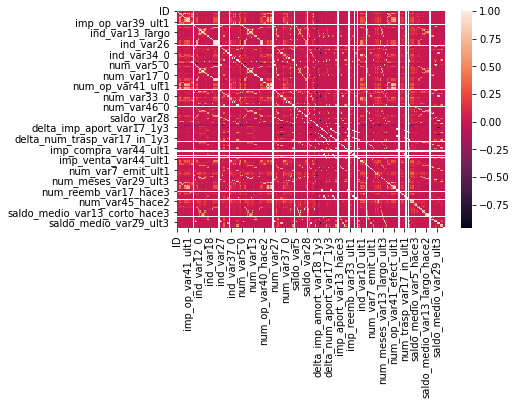

In [49]:
import seaborn as sns
sns.heatmap(df.corr())

In [50]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [51]:
X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [52]:
y.head()

,TARGET
0,0
1,0
2,0
3,0
4,0


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [54]:
X_train.shape, X_test.shape

((7072, 370), (3031, 370))

### Lets apply the variance threshold - Its applied only in training dataset not in test dataset

In [55]:
var_thres = VarianceThreshold()
var_thres.fit(X_train)

VarianceThreshold()

In [56]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [75]:
sum(var_thres.get_support())

284

In [58]:
len(X_train.columns[var_thres.get_support()])

284

In [66]:
X_train.columns[var_thres.get_support()]

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=284)

In [59]:
# var_thres.get_support() ----> True--> non-zero variance, False --> zero variance column
constant_columns=[col for col in X_train.columns if col not in X_train.columns[var_thres.get_support()]]

In [60]:
constant_columns

['ind_var2_0',
 'ind_var2',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var13_medio',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_out_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_var7_emit_ult1',
 

In [69]:
df['ind_var2_0'].var()

0.0

In [77]:
df.var() == 0.0

ID                         False
var3                       False
var15                      False
imp_ent_var16_ult1         False
imp_op_var39_comer_ult1    False
                           ...  
saldo_medio_var44_hace3    False
saldo_medio_var44_ult1     False
saldo_medio_var44_ult3     False
var38                      False
TARGET                     False
Length: 371, dtype: bool

In [74]:
df.loc[:, df.var() == 0.0] # Get all columns with zero variance

,ind_var2_0,ind_var2,ind_var13_medio_0,ind_var13_medio,ind_var18_0,ind_var18,ind_var27_0,ind_var28_0,ind_var28,ind_var27,...,num_trasp_var33_in_hace3,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,saldo_var2_ult1,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var29_hace3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X_train.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
9054,18221,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167392.800000
7072,14182,2,44,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91425.840000
7894,15910,2,35,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22125.000000
3932,7877,2,23,2100.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
5500,11015,2,27,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232733.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.890000
4859,9723,2,24,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.830000
3264,6557,2,24,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.330000
9845,19796,2,38,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.150000
